# E-commerce & B2B Retail Case Study

### Problem:
Schuster is a multinational E-comm retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. It has some employees who keep chasing vendors to get the payment on time; this procedure results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

### Goal: 
- Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).
- Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.
- It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

In [1]:
# Importing necessary packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Step 1: Reading and Understanding Data - Payments recieved dataset

In [2]:
df_payment = pd.read_csv('Received_Payments_Data.csv')
df_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [4]:
df_payment.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


# Step 2: Data Cleaning and Data Preparation

## Handling Missing values 

In [5]:
#Lets Check % of missing values in each column
round(df_payment.isna().sum()/len(df_payment.index)*100,2)

RECEIPT_METHOD           0.00
CUSTOMER_NAME            0.00
CUSTOMER_NUMBER          0.00
RECEIPT_DOC_NO           0.03
RECEIPT_DATE             0.00
CLASS                    0.00
CURRENCY_CODE            0.00
Local Amount             0.00
USD Amount               0.00
INVOICE_ALLOCATED        0.00
INVOICE_CREATION_DATE    0.00
DUE_DATE                 0.00
PAYMENT_TERM             0.00
INVOICE_CLASS            0.00
INVOICE_CURRENCY_CODE    0.00
INVOICE_TYPE             0.00
dtype: float64

The "RECEIPT_DOC_NO" col has 0.03% null values. Dropping the columns as it is not important for model building.

In [6]:
df_payment.drop("RECEIPT_DOC_NO", axis=1, inplace =  True)

In [7]:
df_payment.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

In [8]:
# Lets look at number of unique values in each column
df_payment.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

## Outlier detection

### Interquartile range and Box plot

In [9]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df_payment.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,CUSTOMER_NUMBER,Local Amount,USD Amount
count,93937.000000,9.393700e+04,9.393700e+04
mean,12753.874033,1.066470e+06,5.312013e+05
std,14274.170829,1.546901e+06,9.508693e+05
min,1044.000000,0.000000e+00,0.000000e+00
25%,1888.000000,8.198039e+04,3.766298e+04
50%,4003.000000,4.053438e+05,1.810010e+05
75%,20884.000000,1.425606e+06,5.996137e+05
90%,36457.000000,3.298818e+06,1.257455e+06
95%,44178.400000,4.618005e+06,2.101629e+06
99%,49584.000000,7.075863e+06,5.814128e+06


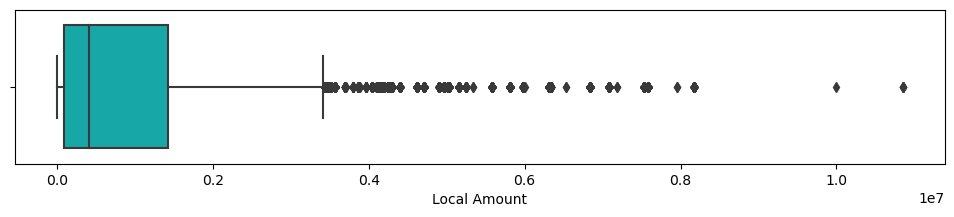

In [10]:
import seaborn as sns
# Lets plot box plot of Local Amount column to check for any outlier 
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=df_payment['Local Amount'],whis=1.5, color = 'c')

Text(0.5, 1.0, 'USD Amount Box-plot')

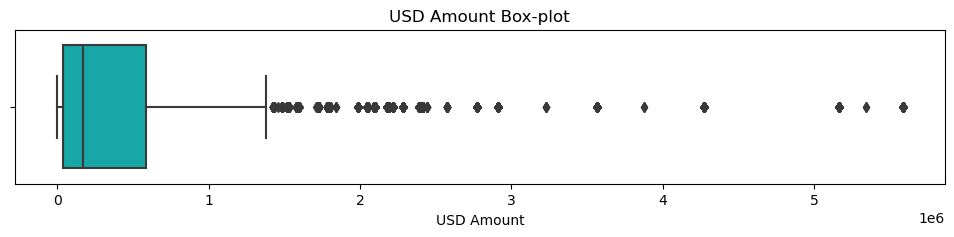

In [216]:
# Lets plot box plot of USD Amount column to check for any outlier 
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=df_payment['USD Amount'],whis=1.5, color = 'c')
plt.title("USD Amount Box-plot")

### Outliers Treatment by Capping Method:

In [12]:
# Removing values beyond 99% for both column Local Amount:
tqm1 = df_payment['Local Amount'].quantile(0.99)
df_payment = df_payment[df_payment["Local Amount"] < tqm1]
df_payment["Local Amount"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9.282600e+04
mean     9.886207e+05
std      1.381143e+06
min      0.000000e+00
25%      8.062728e+04
50%      3.988022e+05
75%      1.294533e+06
90%      3.034583e+06
95%      4.249746e+06
99%      5.814128e+06
max      6.836736e+06
Name: Local Amount, dtype: float64

In [13]:
# Removing values beyond 99% for both column USD Amount:
tqm2 = df_payment['USD Amount'].quantile(0.99)
df_payment = df_payment[df_payment["USD Amount"] < tqm2]
df_payment["USD Amount"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9.173900e+04
mean     4.448874e+05
std      7.055042e+05
min      0.000000e+00
25%      3.610266e+04
50%      1.675171e+05
75%      5.900000e+05
90%      1.113644e+06
95%      1.802273e+06
99%      3.561922e+06
max      5.582546e+06
Name: USD Amount, dtype: float64

In [14]:
# Final look at outliers at 25%,50%,75%,90%,95% and above
df_payment.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,CUSTOMER_NUMBER,Local Amount,USD Amount
count,91739.000000,9.173900e+04,9.173900e+04
mean,12790.644655,9.263675e+05,4.448874e+05
std,14405.762950,1.263819e+06,7.055042e+05
min,1044.000000,0.000000e+00,0.000000e+00
25%,1888.000000,7.991842e+04,3.610266e+04
50%,3997.000000,3.755132e+05,1.675171e+05
75%,20959.000000,1.224990e+06,5.900000e+05
90%,37398.000000,2.912826e+06,1.113644e+06
95%,44540.000000,3.794467e+06,1.802273e+06
99%,49584.000000,5.029646e+06,3.561922e+06


In [15]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91739 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         91739 non-null  object 
 1   CUSTOMER_NAME          91739 non-null  object 
 2   CUSTOMER_NUMBER        91739 non-null  int64  
 3   RECEIPT_DATE           91739 non-null  object 
 4   CLASS                  91739 non-null  object 
 5   CURRENCY_CODE          91739 non-null  object 
 6   Local Amount           91739 non-null  float64
 7   USD Amount             91739 non-null  float64
 8   INVOICE_ALLOCATED      91739 non-null  object 
 9   INVOICE_CREATION_DATE  91739 non-null  object 
 10  DUE_DATE               91739 non-null  object 
 11  PAYMENT_TERM           91739 non-null  object 
 12  INVOICE_CLASS          91739 non-null  object 
 13  INVOICE_CURRENCY_CODE  91739 non-null  object 
 14  INVOICE_TYPE           91739 non-null  object 
dtypes:

#### Now moving to Data Cleaning part

In [16]:
# Changing the date related columns to pandas datatime object

df_payment['RECEIPT_DATE'] = pd.to_datetime(df_payment['RECEIPT_DATE'])
df_payment['INVOICE_CREATION_DATE'] = pd.to_datetime(df_payment['INVOICE_CREATION_DATE'])
df_payment['DUE_DATE'] = pd.to_datetime(df_payment['DUE_DATE'])

In [17]:
# Verifying changes
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91739 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         91739 non-null  object        
 1   CUSTOMER_NAME          91739 non-null  object        
 2   CUSTOMER_NUMBER        91739 non-null  int64         
 3   RECEIPT_DATE           91739 non-null  datetime64[ns]
 4   CLASS                  91739 non-null  object        
 5   CURRENCY_CODE          91739 non-null  object        
 6   Local Amount           91739 non-null  float64       
 7   USD Amount             91739 non-null  float64       
 8   INVOICE_ALLOCATED      91739 non-null  object        
 9   INVOICE_CREATION_DATE  91739 non-null  datetime64[ns]
 10  DUE_DATE               91739 non-null  datetime64[ns]
 11  PAYMENT_TERM           91739 non-null  object        
 12  INVOICE_CLASS          91739 non-null  object        
 13  I

In [18]:
# Using boolean values and converting them into integer to create the target column 
df_payment['Target'] = (df_payment["RECEIPT_DATE"] > df_payment["DUE_DATE"]).astype(int)

In [19]:
df_payment['Target'].value_counts()

1    60515
0    31224
Name: Target, dtype: int64

# Step 3: Exploratory Data Analysis

Lets first check the Target columns to see data imbalance

<Axes: title={'center': 'Data Imbalance Chart'}, ylabel='Target'>

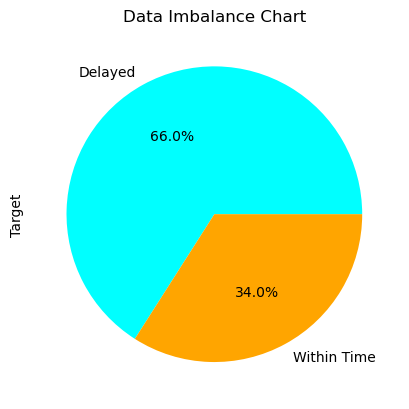

In [20]:
(df_payment["Target"].value_counts(normalize = True)*100).plot.pie(labels = ["Delayed","Within Time"], colors = ['cyan','orange'],autopct='%1.1f%%', title = "Data Imbalance Chart")

In [21]:
# Lets segregate the columns as per categorical, numerical and Date 
# Categorical Columns
cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS',
           'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE','RECEIPT_METHOD']

# Numerical Columns
num_cols= ['Local Amount', 'USD Amount']

#date Cols
date_cols= ['RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE']

#### Univariate Analysis

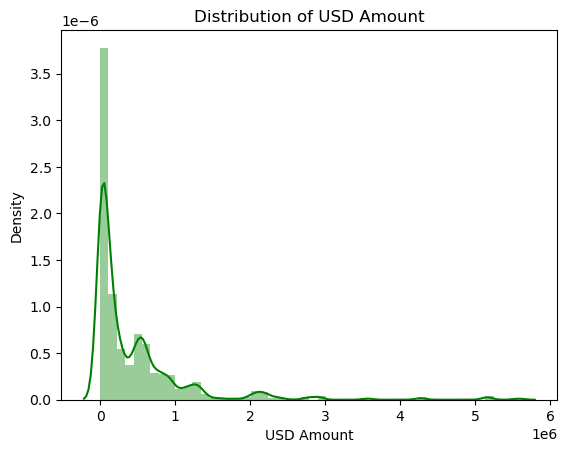

In [22]:
#For Numeric Columns:
#Visualizing the distribution of USD amount column
sns.distplot(df_payment['USD Amount'], color = 'green')
plt.title('Distribution of USD Amount')
plt.show()

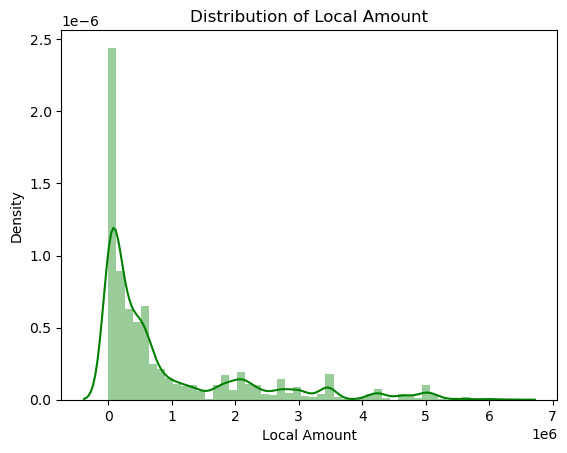

In [23]:
#Visualizing the distribution of local amount column
sns.distplot(df_payment['Local Amount'], color = 'green')
plt.title('Distribution of Local Amount')
plt.show()

Since Local Amount column contains amount for different currency, we can utilise USD amount column and safely drop Local Amount

In [24]:
# Dropping the 'Local Amount' column
df_payment.drop('Local Amount', axis=1, inplace=True)

# Checking the head of data
df_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Target
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [25]:
#Univariate analysis for Categorical Columns
# Finding the number of Unique customer names
df_payment['CUSTOMER_NAME'].nunique()

690

In [26]:
# Top10 - FREQUENCY
# Top 10 customers on the basis of frequency of invoices
df_payment['CUSTOMER_NAME'].value_counts().head(10)

SEPH Corp    21087
FARO Corp    14868
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1645
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: CUSTOMER_NAME, dtype: int64

In [27]:
# Class
# Number of Unique Classes
df_payment['CLASS'].nunique()

1

In [28]:
# Dropping the CLASS column as it has only one value
df_payment.drop('CLASS', axis=1, inplace=True)

In [29]:
# Currency Code
# Number of Unique Currency Codes
df_payment['CURRENCY_CODE'].nunique()

8

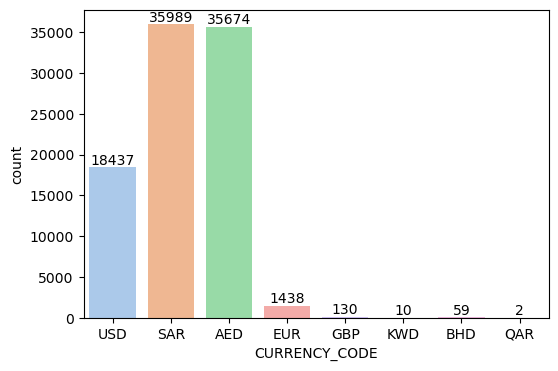

In [30]:
# Visualising the Currency column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_payment, x='CURRENCY_CODE', palette= "pastel")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Above graph depicts that the Currency used for bill payments are mostly USD, SAR or AED.

In [31]:
# Payment Term
# Number of unique values in Payment Term
df_payment['PAYMENT_TERM'].nunique()

42

In [32]:
# Finding top 10 payment term against frequency
df_payment['PAYMENT_TERM'].value_counts().head(10)

60 Days from Inv Date    19013
30 Days from Inv Date    14672
60 Days from EOM         11932
30 Days from EOM         11303
15 Days from EOM          7437
Immediate                 5240
Immediate Payment         4885
90 Days from EOM          3893
45 Days from Inv Date     3545
45 Days from EOM          3490
Name: PAYMENT_TERM, dtype: int64

<Axes: >

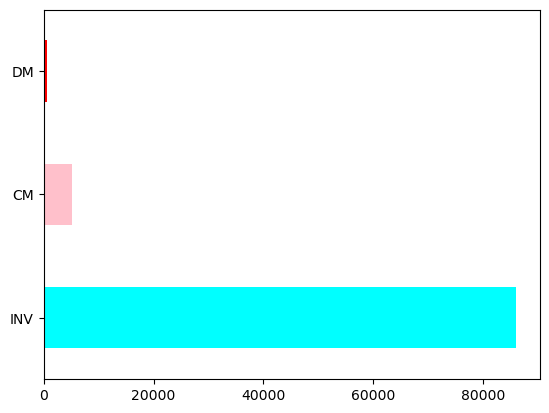

In [33]:
# INVOICE_CLASS
# Visualising the Number of Unique items in invoice class
df_payment['INVOICE_CLASS'].value_counts().plot.barh(color = ["cyan","pink","red"])

Above graph depicts that INV has the maximum number of bills in INVOICE_CLASS column.

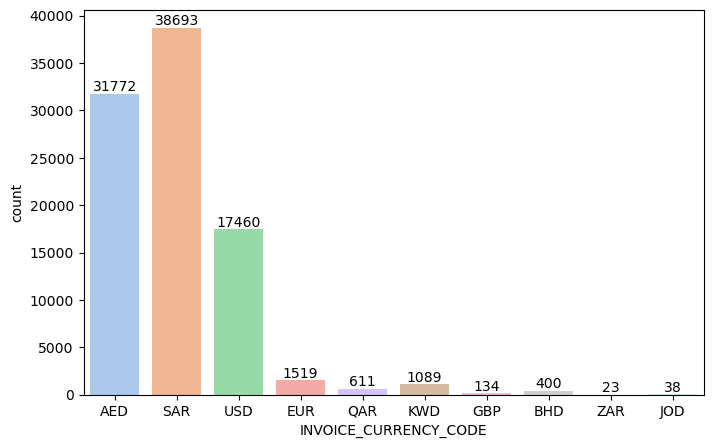

In [34]:
# Invoice Currency Code
# Visualising the INVOICE_CURRENCY_CODE column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_payment, x='INVOICE_CURRENCY_CODE', palette = "pastel")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [35]:
# Invoice Type
# Number of unique values in invoice types
df_payment['INVOICE_TYPE'].nunique()

2

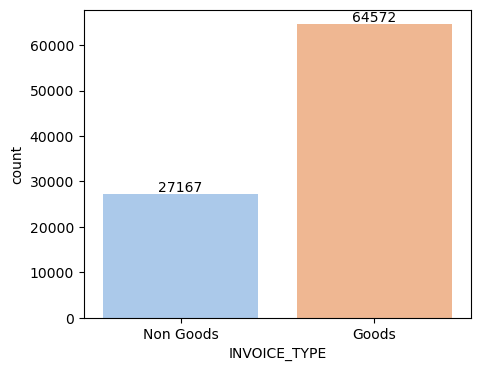

In [36]:
# Visualising the INVOICE_TYPE column
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df_payment, x='INVOICE_TYPE', palette = "pastel")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [37]:
# Checking the value count of each level of INVOICE_TYPE
df_payment['INVOICE_TYPE'].value_counts(normalize = True)*100

Goods        70.38664
Non Goods    29.61336
Name: INVOICE_TYPE, dtype: float64

Almost 70% of the invoices generated were for Goods products.

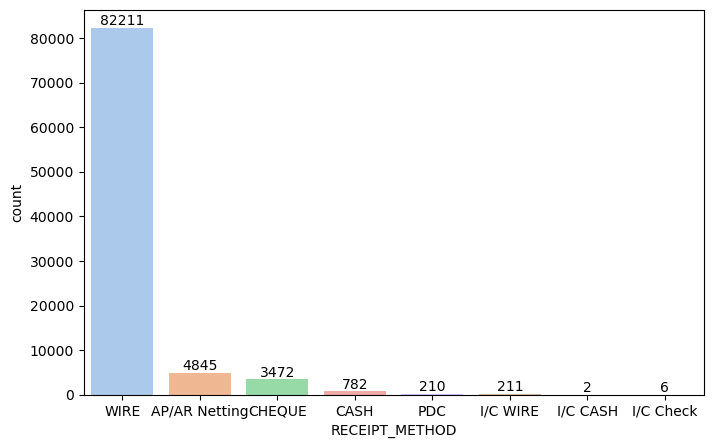

In [38]:
# Receipt Method
# Visualising the RECEIPT_METHOD column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_payment, x='RECEIPT_METHOD', palette = "pastel")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Above graph depicts that the most preferred payment method for bill payment is WIRE.


#### Bivariate Analysis 

In [39]:
# Extracting month from the date columns

df_payment['month_reciept'] = df_payment['RECEIPT_DATE'].dt.month
df_payment['month_inv_creation'] = df_payment['INVOICE_CREATION_DATE'].dt.month
df_payment['month_due'] = df_payment['DUE_DATE'].dt.month

In [40]:
# Month-wise invoices due
orders_due_month = df_payment.groupby('month_due').count()['DUE_DATE']
orders_due_month

month_due
1     13238
2     12787
3     14585
4     13990
5     12337
6     10411
7      1595
8      1112
9       978
10     1648
11     2795
12     6263
Name: DUE_DATE, dtype: int64

In [41]:
# Effect of monthly due on late payment rate

# Creating a pivot table to see the effects of different months on percentage of late payments
late_dues = df_payment.groupby('month_due').mean()['Target']
late_dues.sort_index(ascending= True)

month_due
1     0.714912
2     0.685071
3     0.620775
4     0.618084
5     0.577855
6     0.412160
7     0.389342
8     0.800360
9     0.976483
10    0.999393
11    1.000000
12    0.999840
Name: Target, dtype: float64

In [42]:
# effects of month in which payment is due on late payment rate

dues_late = df_payment.groupby('month_due').mean()['Target'] 
# Creating a pivot table to see the effects of different months on percentage of late payments
dues_late.sort_index(ascending= True)

month_due
1     0.714912
2     0.685071
3     0.620775
4     0.618084
5     0.577855
6     0.412160
7     0.389342
8     0.800360
9     0.976483
10    0.999393
11    1.000000
12    0.999840
Name: Target, dtype: float64

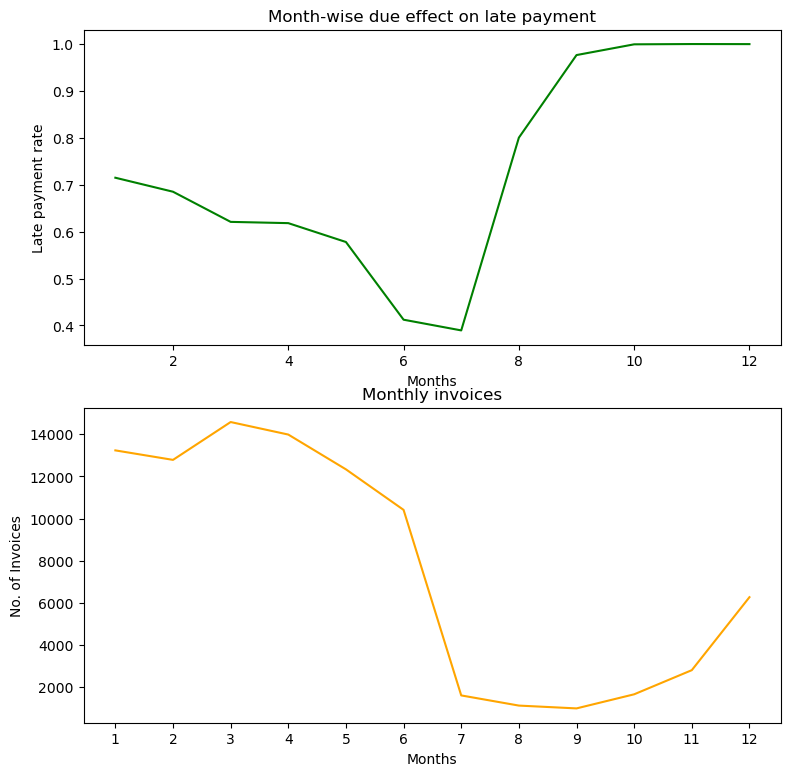

In [43]:
# Visualising the effect of month on late payment rate

plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(late_dues, color='green')
plt.title("Month-wise due effect on late payment")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(orders_due_month, color='orange')
plt.title("Monthly invoices")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

Above graph depicts that:
1. For the 3rd month, the number of invoices is the highest and late payment rate is comparatively lower than other months with large number of invoices.
2. Month 7 has the very low late payment rate, this can be because of the fact that the number of invoices is also low.
3. In the 2nd half of the year, the late payment increases steeply from 7th month onwards. The number of invoices are comparatively lower than the first half of the year.

In [44]:
# Receipt_date
# number of payments received in a month
order_month_receipt = df_payment.groupby('month_reciept').count()['DUE_DATE']  

# out of all the payments received in month how many were late payments
monthly_receipt = df_payment.groupby('month_due').mean()['Target']

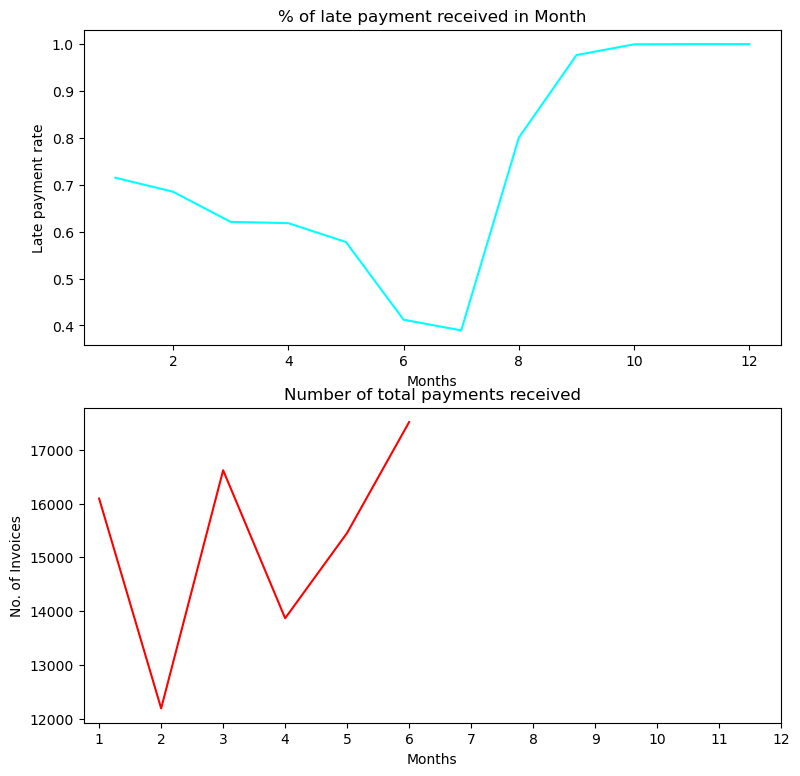

In [45]:
# Visualizing the effect of month in which the invoice is due, on the late payment rate
plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(monthly_receipt, color='cyan')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(order_month_receipt, color='red')
plt.title("Number of total payments received")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

Above graphs depict that from 7th month onwards, none of the invoices are paid i.e. No payment received against any invoices after 7th month.

In [46]:
# invoice creation date

orders_month_created = df_payment.groupby('month_inv_creation').count()['DUE_DATE'] 

month_created = df_payment.groupby('month_inv_creation').mean()['Target'] 

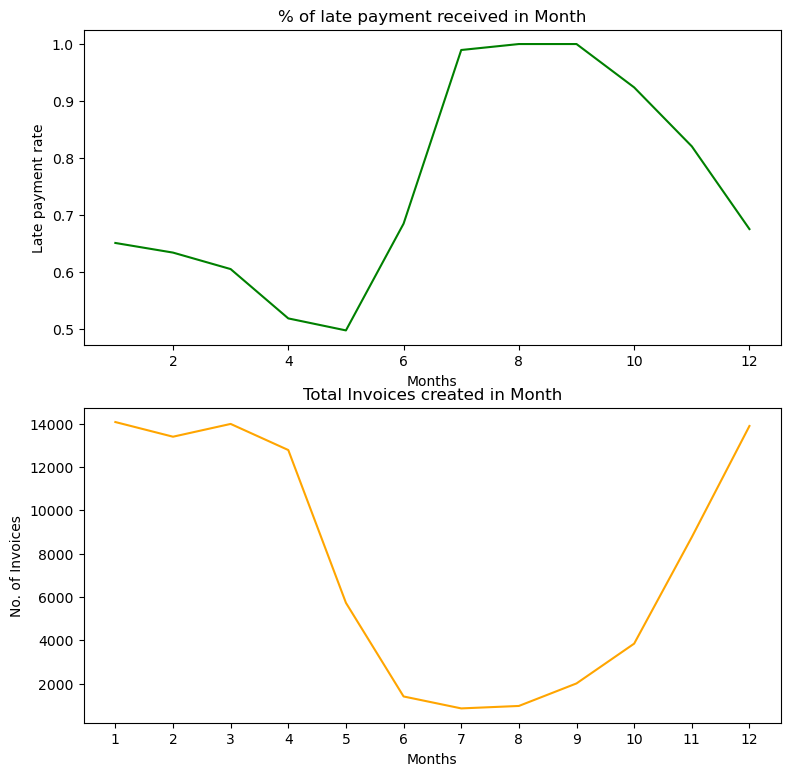

In [47]:
# Visualizing the effect of months in which the invoice is due, on the late payment rate
plt.figure(figsize=(9,9))

plt.subplot(2,1,1)
plt.plot(month_created, color='green')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(orders_month_created, color='orange')
plt.title("Total Invoices created in Month")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

Above graphs depict that:
1. Late payment rate decreases from 1st to 5th month.
2. For the months 7, 8 and 9, the late payment rate is very high.    

Lets see Amount received within time versus Late payment 

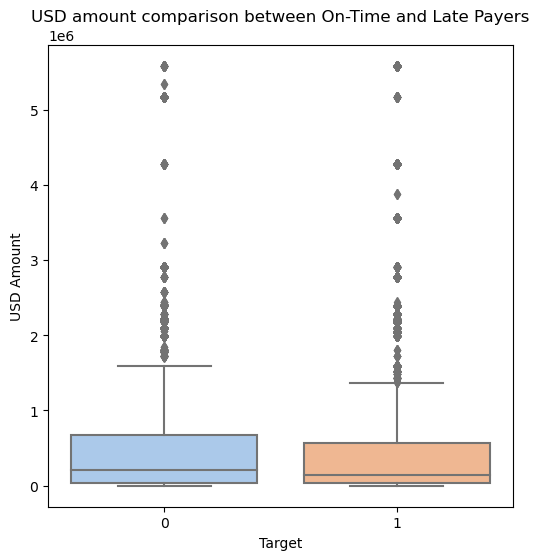

In [48]:
plt.figure(figsize=(6,6))

sns.boxplot(x='Target', y = 'USD Amount',  data = df_payment, palette = "pastel")
plt.title("USD amount comparison between On-Time and Late Payers")

plt.show()

In [49]:
# Customer Name

customer_num_of_orders= df_payment.groupby('CUSTOMER_NAME').count()['Target'].sort_values(ascending= False).reset_index()
customer_num_of_orders_late= df_payment.groupby('CUSTOMER_NAME').mean()['Target'].sort_values(ascending= False).reset_index()

In [50]:
# Finding the important customers (customers with more than 500 orders)
imp_cust = customer_num_of_orders[customer_num_of_orders['Target'] > 500]['CUSTOMER_NAME']
imp_cust

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    GIVE Corp
22    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [51]:
# Checking only important customers having late payments

imp_cust_late = customer_num_of_orders_late[customer_num_of_orders_late['CUSTOMER_NAME'].isin(imp_cust)]
imp_cust_late

,CUSTOMER_NAME,Target
214,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
257,GIVE Corp,0.917148
274,LIFE Corp,0.899522
290,PARI Corp,0.876153
309,PARF Corp,0.847222
311,AL S Corp,0.842788
343,CHRI Corp,0.787276
344,CARR Corp,0.786765


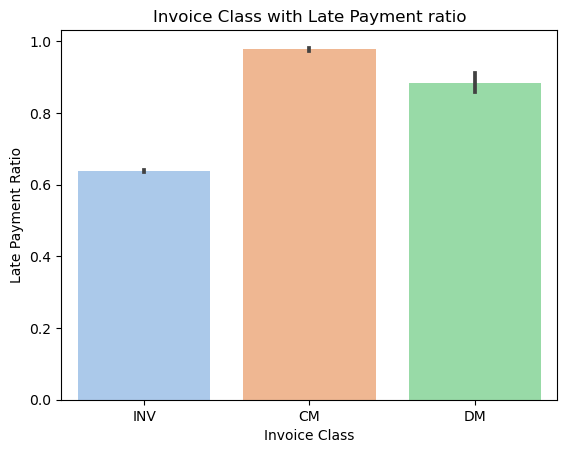

In [52]:
# Visualising the late payment ratio of each invoice class

sns.barplot(data=df_payment, x='INVOICE_CLASS', y='Target', estimator=np.mean, palette = "pastel")
plt.title("Invoice Class with Late Payment ratio")
plt.xlabel("Invoice Class")
plt.ylabel("Late Payment Ratio")
plt.show()

Above graph depicts that Late payment ratio for INVOICE_CLASS is very high for CM and lowest for INV.

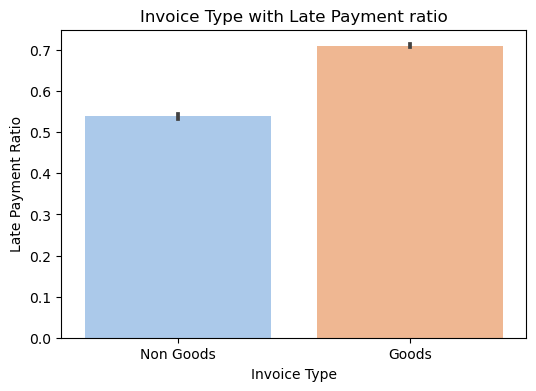

In [53]:
# Visualising the late payment ratio of each Invoice Type
plt.figure(figsize=(6,4))

sns.barplot(data=df_payment, x='INVOICE_TYPE', y='Target', estimator=np.mean, palette = "pastel")
plt.title("Invoice Type with Late Payment ratio")
plt.xlabel("Invoice Type")
plt.ylabel("Late Payment Ratio")
plt.show()

Above graph depicts that Late payment ratio for INVOICE TYPE is very high for GOODS than Non Goods

# Step 4: Feature Engineering

In [54]:
# Using cumsum() function to get cummulative sum on value_counts()

pay_term_cumsum = df_payment['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

60 Days from Inv Date                                      0.207251
30 Days from Inv Date                                      0.367183
60 Days from EOM                                           0.497248
30 Days from EOM                                           0.620456
15 Days from EOM                                           0.701523
Immediate                                                  0.758641
Immediate Payment                                          0.811890
90 Days from EOM                                           0.854326
45 Days from Inv Date                                      0.892968
45 Days from EOM                                           0.931011
90 Days from Inv Date                                      0.955112
100% Adv Payment                                           0.968585
25 DAYS FROM EOM                                           0.973621
Cash on Delivery                                           0.978177
15 Days from Inv Date                           

In [55]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

df_payment['PAYMENT_TERM'] = df_payment['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM
df_payment['PAYMENT_TERM'] = df_payment['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = df_payment['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

60 Days from Inv Date                                      0.207251
30 Days from Inv Date                                      0.367183
60 Days from EOM                                           0.497248
30 Days from EOM                                           0.620456
Immediate Payment                                          0.730823
15 Days from EOM                                           0.811890
90 Days from EOM                                           0.854326
45 Days from EOM                                           0.895835
45 Days from Inv Date                                      0.934477
90 Days from Inv Date                                      0.958578
100% Adv Payment                                           0.972051
25 DAYS FROM EOM                                           0.977087
Cash on Delivery                                           0.981644
15 Days from Inv Date                                      0.985524
On Consignment                                  

Above summary suggest that around 95% of data is covered by 10 values, hence we will club the rest of the values to others in both datasets.

In [56]:
# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]

# Clubbing the rest values to others
df_payment['PAYMENT_TERM'] = df_payment['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')

In [57]:
# Reverifying
df_payment['PAYMENT_TERM'].value_counts() 

60 Days from Inv Date    19013
30 Days from Inv Date    14672
60 Days from EOM         11932
30 Days from EOM         11303
Immediate Payment        10125
15 Days from EOM          7437
90 Days from EOM          3893
45 Days from EOM          3808
others                    3800
45 Days from Inv Date     3545
90 Days from Inv Date     2211
Name: PAYMENT_TERM, dtype: int64

#### One Hot Encoding

In [58]:
# Creating dummy variables for the 'PAYMENT_TERM' column

term_dummies= pd.get_dummies(df_payment['PAYMENT_TERM']).drop('others', axis=1)

df_payment = df_payment.join(term_dummies).drop('PAYMENT_TERM', axis=1 )

In [59]:
df_payment.shape # Sanity Check

(91739, 26)

In [60]:
# Creating dummy variables for the 'INVOICE_CLASS' column

class_dummies= pd.get_dummies(df_payment['INVOICE_CLASS'], drop_first=True)
class_dummies
df_payment = df_payment.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

In [61]:
df_payment.shape

(91739, 27)

In [62]:
df_payment.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,0,0,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,1,0,0,0,0,0,0,0,0,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,1,0,0,0,0,0,0,0,0,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,1,0,0,0,0,0,0,0,0,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,1,0,0,0,0,0,0,0,0,1


###  Reading and Understanding Data - Open Invoice Data dataset 


In [63]:
# Reading the open invoice dataset
df_open_inv_data = pd.read_csv("Open_Invoice_data.csv", encoding='latin1')
df_open_inv_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [64]:
df_open_inv_data.shape

(88204, 14)

In [65]:
# Removing unecessary columns (that are not there in the received payment dataset)
# As per Data Dictionary, Dropping 'Transaction Number','Customer Account No' as they bear no significance for our Target var.
# Dropping 'Local amount'

df_open_inv_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [66]:
# Checking the shape of the data again
df_open_inv_data.shape

(88204, 7)

In [67]:
# Checking the head
df_open_inv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [68]:
# Checking the info of the data
df_open_inv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [69]:
# Checking for null values
df_open_inv_data.isnull().sum()

Customer_Name        0
Payment Term         0
Due Date             0
Transaction Class    0
AGE                  0
USD Amount           0
INV_CREATION_DATE    0
dtype: int64

There are No null values present in the dataset.

In [70]:
# Changing the format of 'Due Date' and 'INV_CREATION_DATE' to pandas datetime
df_open_inv_data['Due Date'] = pd.to_datetime(df_open_inv_data['Due Date'])
df_open_inv_data['INV_CREATION_DATE'] = pd.to_datetime(df_open_inv_data['INV_CREATION_DATE'])

In [71]:
# Verifying changes
df_open_inv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      88204 non-null  object        
 1   Payment Term       88204 non-null  object        
 2   Due Date           88204 non-null  datetime64[ns]
 3   Transaction Class  88204 non-null  object        
 4   AGE                88204 non-null  int64         
 5   USD Amount         88204 non-null  object        
 6   INV_CREATION_DATE  88204 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 4.7+ MB


In [72]:
# USD amount is an object dtype and to convert it to numeric, lets clean the column to remove ,
df_open_inv_data['USD Amount'] = df_open_inv_data['USD Amount'].apply(lambda x: x.replace(",", ""))
df_open_inv_data['USD Amount'] = df_open_inv_data['USD Amount'].astype(int)

In [73]:
# Checking the USD Amount column again
df_open_inv_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

In [74]:
# Removing rows with negative USD values
df_open_inv_data = df_open_inv_data[df_open_inv_data['USD Amount'] > 0]

In [75]:
# Checking the info of the data set
df_open_inv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


### Feature Engineering

In [76]:
# Keeping the same levels as done in recieved payment dataset
df_open_inv_data['Payment Term'] = df_open_inv_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')

df_open_inv_data['Payment Term'].value_counts()

30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: Payment Term, dtype: int64

In [77]:
# Creating dummy variables for the column
term_dummies_open = pd.get_dummies(df_open_inv_data['Payment Term']).drop('others', axis=1)

# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
df_open_inv_data = df_open_inv_data.join(term_dummies_open).drop('Payment Term', axis=1)
df_open_inv_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


In [78]:
# Checking the levels in the column
df_open_inv_data['Transaction Class'].value_counts()

INVOICE       78251
DEBIT NOTE     1265
Name: Transaction Class, dtype: int64

In [79]:
# To have uniform invoice type, lets replace INVOICE with INV and DEBIT NOTE WITH DM
df_open_inv_data['Transaction Class'] = df_open_inv_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [80]:
# Creating dummy variables for the column
tc = pd.get_dummies(df_open_inv_data['Transaction Class'])

# Adding the dummy variables to main dataset and dropping the Transaction Class column
df_open_inv_data = df_open_inv_data.join(tc).drop('Transaction Class', axis=1)

In [81]:
print(df_payment.columns)
print(df_open_inv_data.columns)

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Target', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV'],
      dtype='object')
Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV'],
      dtype='object')


In [82]:
# Lets Create a new column to show actual number of days taken to make the payment after invoice generation
df_payment['act_days_for_pay'] = (df_payment['RECEIPT_DATE']-df_payment['INVOICE_CREATION_DATE']).dt.days

In [83]:
# Calculating customer wise average days for payment
cust_seg1= df_payment.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250
...,...
YOUS Corp,117.000000
ZAHR Corp,144.928571
ZAIN Corp,67.095238


In [84]:
# Lets Calculate the standard deviation for customer wise payment days
cust_seg2 = df_payment.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326
...,...
YOUS Corp,33.949160
ZAHR Corp,52.197059
ZAIN Corp,46.326945


In [85]:
# Merging the above two dataframes
cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

# Checking the head
cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


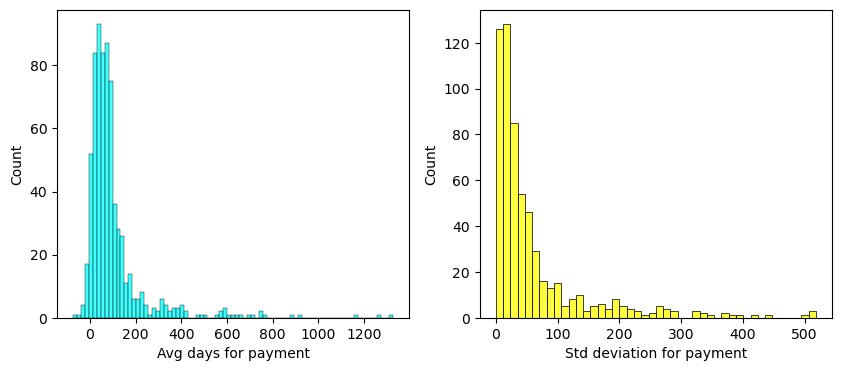

In [86]:
# Visualising the cust_seg dataframe
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'], color = "cyan")

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'], color = "yellow")

plt.show()

Above plots shows that the data is skewed and not normalized, hence need to do scaling.

#### Standard Scaling

In [87]:
#importing required library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cust_seg[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])

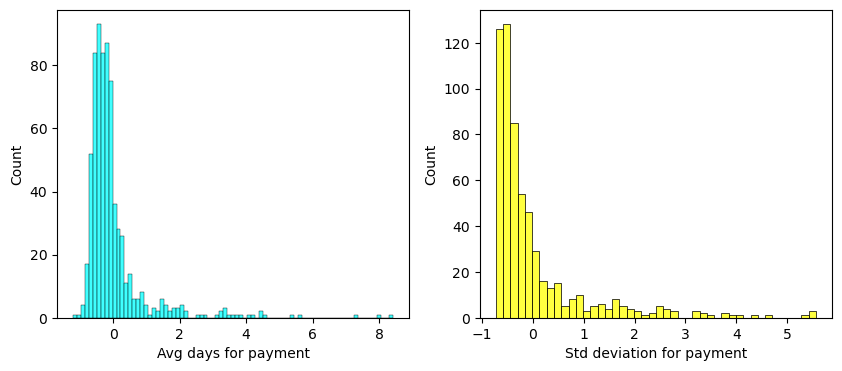

In [88]:
# Visualising the cust_seg dataframe again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'], color = "cyan")

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'], color = "yellow")

plt.show()

Looks like there are certain NA values in the data

In [89]:
# resetting the index
cust_seg.reset_index(inplace=True)

# Checking the null values if present
round(cust_seg.isna().sum()/len(cust_seg.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1246
dtype: float64

In [90]:
# Replacing the null values for Std deviation for payment with 0
cust_seg['Std deviation for payment'].fillna(0,inplace=True)

In [91]:
# copying the cust_seg data for clustering into new dataframe
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.539481,-0.569396
1,6TH Corp,-0.427510,-0.631170
2,A3 D Corp,-0.394938,-0.089275
3,ABC Corp,-0.597253,-0.727738
4,ABDU Corp,-0.178128,-0.060887


In [92]:
#dropping customer_name for clustering
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.539481,-0.569396
1,-0.427510,-0.631170
2,-0.394938,-0.089275
3,-0.597253,-0.727738
4,-0.178128,-0.060887


### Clustering

In [93]:
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [94]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[-0.29849529, -0.33005181],
       [ 1.77263436,  3.46355586],
       [ 0.47233694,  1.0340401 ],
       [ 4.56838457,  0.49310899]])

Lets find the optimal number of clusters

In [95]:
# silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7511601581633407
For n_clusters=3, the silhouette score is 0.7322538635887311
For n_clusters=4, the silhouette score is 0.6189806287143493
For n_clusters=5, the silhouette score is 0.621673579066622
For n_clusters=6, the silhouette score is 0.39996314887829815
For n_clusters=7, the silhouette score is 0.40103827086454724
For n_clusters=8, the silhouette score is 0.4174515831627721


From the above results, we can see that for 3 clusters, the silhouette score is decent. Hence selecting n_clusters as 3.

In [96]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [97]:
# Assigning labels to the cust_seg dataframe
cust_seg['cluster_id'] = kmeans.labels_
cust_seg.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.539481,-0.569396,0
1,6TH Corp,-0.427510,-0.631170,0
2,A3 D Corp,-0.394938,-0.089275,0
3,ABC Corp,-0.597253,-0.727738,0
4,ABDU Corp,-0.178128,-0.060887,0


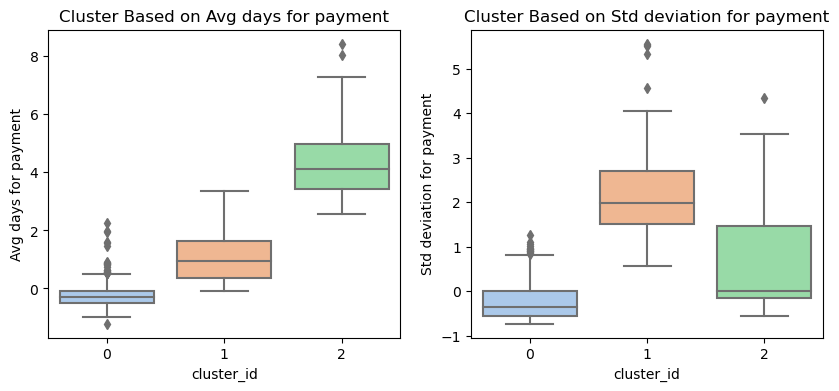

In [98]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg, palette = "pastel")
plt.title("Cluster Based on Avg days for payment")

plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg, palette = "pastel")
plt.title("Cluster Based on Std deviation for payment")
plt.show()

'0' Cluster -- Early Invoice Payment

'1' Cluster -- Medium Invoice Payment

'2' Cluster -- Prolonged Invoice Payment



In [99]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers
cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [100]:
# Creating a copy
cust_dict = cust_seg.copy()

In [101]:
# Renaming the column
cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,0
1,6TH Corp,0
2,A3 D Corp,0
3,ABC Corp,0
4,ABDU Corp,0


In [102]:
# Setting the 'Customer_Name' as index
cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,0
6TH Corp,0
A3 D Corp,0
ABC Corp,0
ABDU Corp,0
...,...
YOUS Corp,0
ZAHR Corp,0
ZAIN Corp,0


Text(0.5, 1.0, 'Customer Segment Distribution Chart')

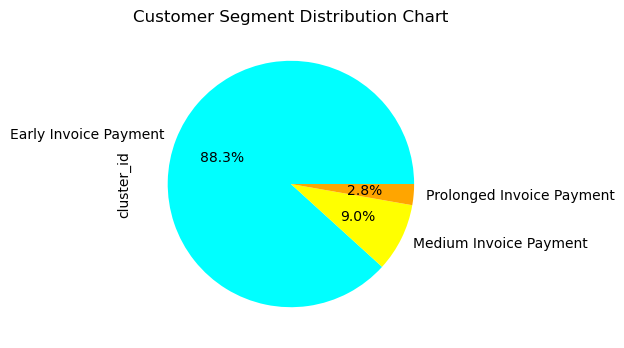

In [103]:
(cust_dict.cluster_id.value_counts(normalize = True)*100).plot.pie(labels = ["Early Invoice Payment","Medium Invoice Payment","Prolonged Invoice Payment"],autopct='%1.1f%%',  colors = ['cyan','yellow','orange'], figsize=(4,4))
plt.title("Customer Segment Distribution Chart")

Above graph depicts that Early customers constitute 88.3% of customers whereas medium and prolonged payers are 11.8% in total

In [104]:
# Merging payment and cust_deg to add clustering index
merged_df = pd.merge(df_payment, cust_seg, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.630400,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,1,169,0
1,WIRE,C EA Corp,37403,2021-05-19,AED,2859.090000,1.2721E+11,2021-04-07,2021-05-30,AED,...,0,0,0,0,0,0,0,1,42,0
2,WIRE,C EA Corp,37403,2021-02-20,AED,10.578625,2.412E+11,2020-11-26,2020-12-26,AED,...,0,0,0,0,0,0,0,1,86,0
3,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.211330,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,1,33,0
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.609710,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,1,1,0


In [105]:
# checking null values for clusters
merged_df['cluster_id'].isnull().sum()

0

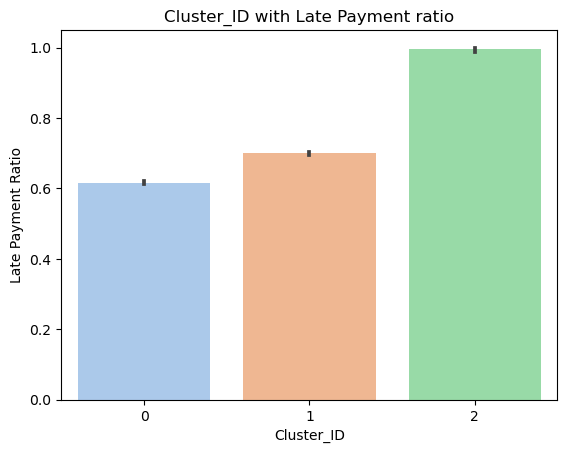

In [106]:
sns.barplot(data=merged_df, x='cluster_id', y='Target', estimator=np.mean, palette = "pastel")
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

In [107]:
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Target', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV',
       'act_days_for_pay', 'cluster_id'],
      dtype='object')

# Step 5: Data Preparation of combined df for Model Building

In [108]:
# Creating a new dataframe with important variables for model building
reg_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'cluster_id']]
reg_df.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id
0,101018.630400,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2859.090000,2021-04-07,0,1,0,0,0,0,0,0,0,0,0,1,0
2,10.578625,2020-11-26,0,0,1,0,0,0,0,0,0,0,0,1,0
3,48990.211330,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0
4,41991.609710,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0


In [109]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
reg_df['Invoice_Month'] = reg_df['INVOICE_CREATION_DATE'].dt.month
reg_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [110]:
reg_df.shape

(91739, 15)

In [111]:
# Open Invoice dataset
open_reg_df = df_open_inv_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV','AGE']]
open_reg_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,-25


In [112]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_reg_df['Invoice_Month'] = open_reg_df['INV_CREATION_DATE'].dt.month
open_reg_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_reg_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,0,1,-25,3


In [113]:
# Creating Due_Month column and dropping Due Date
open_reg_df['Due_Month'] = open_reg_df['Due Date'].dt.month
open_reg_df.drop('Due Date',axis=1,inplace= True)
open_reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,-25,3,4


In [114]:
# Checking columns for both datasets
reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

In [115]:
open_reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

# Step 6: Train- Test Split

In [116]:
# Independent variables X
X = reg_df.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [117]:
# Target variable y
y = merged_df['Target']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Target, dtype: int32

In [118]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
87299,1.342879e+04,0,0,0,0,0,0,0,0,1,0,0,1,0,10
30527,8.983173e+05,0,0,0,0,0,0,0,0,0,1,0,1,1,11
55217,4.187392e+04,0,0,1,0,0,0,0,0,0,0,0,1,0,4
63837,2.666134e+03,0,0,0,1,0,0,0,0,0,0,0,1,0,3
75408,1.724534e+06,0,0,1,0,0,0,0,0,0,0,0,1,0,3


#### Feature Scaling


In [119]:
X_train.shape

(64217, 15)

In [120]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
87299,-0.611804,0,0,0,0,0,0,0,0,1,0,0,1,0,10
30527,0.641478,0,0,0,0,0,0,0,0,0,1,0,1,1,11
55217,-0.571517,0,0,1,0,0,0,0,0,0,0,0,1,0,4
63837,-0.627047,0,0,0,1,0,0,0,0,0,0,0,1,0,3
75408,1.811661,0,0,1,0,0,0,0,0,0,0,0,1,0,3


In [121]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
count,6.421700e+04,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000,64217.000000
mean,-1.305636e-17,0.081894,0.123379,0.159786,0.041313,0.038946,0.130931,0.207017,0.042668,0.023934,0.109379,0.006167,0.937618,0.522183,5.503527
std,1.000008e+00,0.274206,0.328874,0.366411,0.199015,0.193468,0.337328,0.405171,0.202109,0.152846,0.312117,0.078286,0.241850,0.504290,4.083495
min,-6.308233e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.796905e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,-3.935662e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
75%,2.048029e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
max,7.275824e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


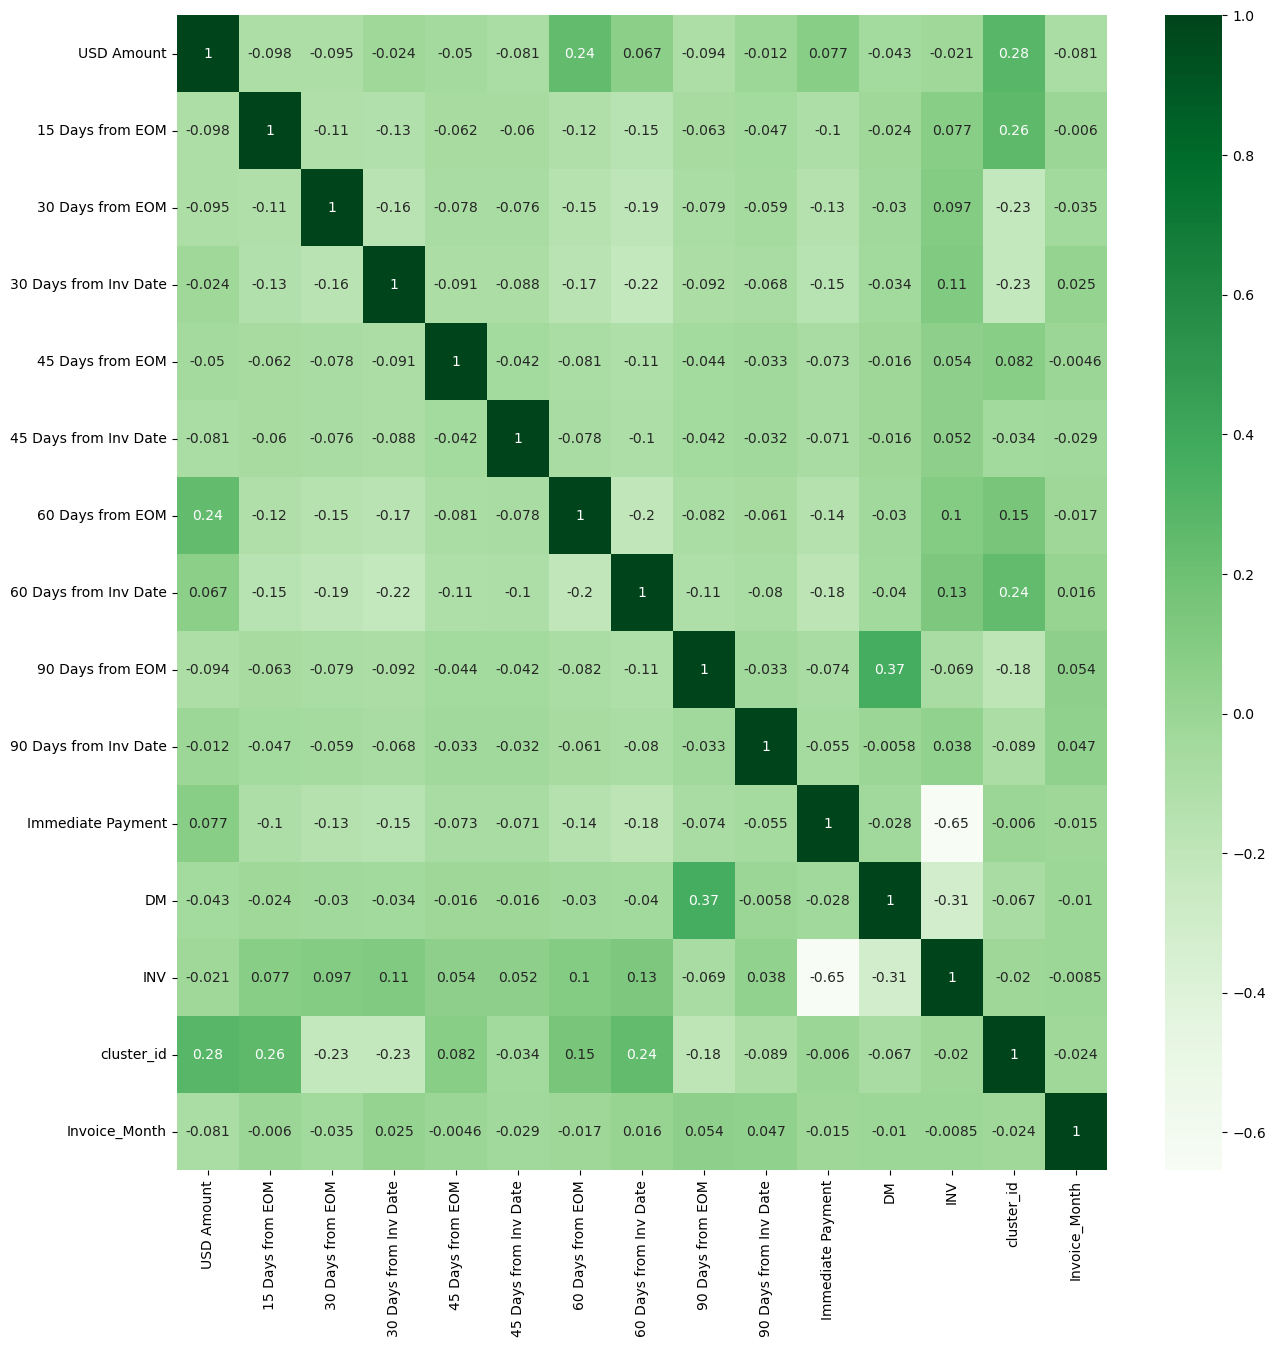

In [122]:
# Plotting heat map of X_train dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True, cmap= "Greens")
plt.show()

INV & Immediate Payment has high multicollinearity, dropping INV

In [123]:
X_train.drop(['INV'], axis=1, inplace=True)
X_test.drop(['INV'], axis=1, inplace=True)

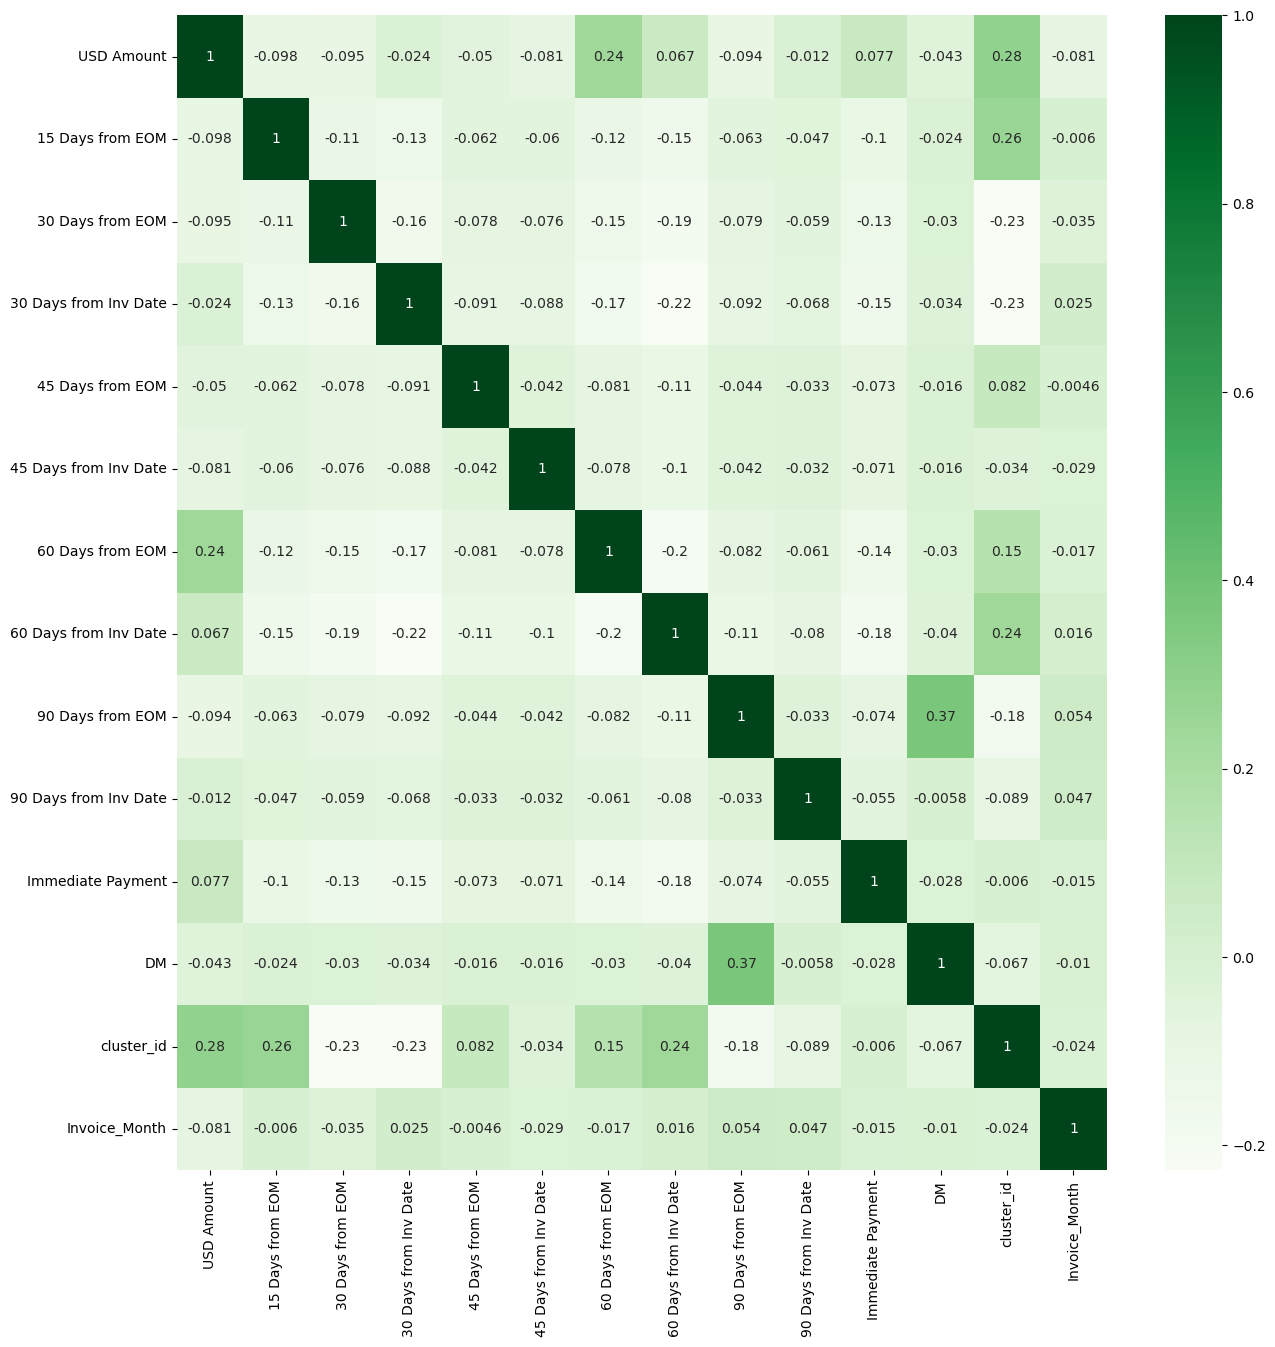

In [124]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True, cmap = "Greens")
plt.show()

Now the data has no high multicollinearity. Going ahead with model building


# Step 7: Model Building


Using Logistic Regression for classification task


In [125]:
# Importing required library for building logistic regression model
import statsmodels.api as sm

##### 1st Model


In [126]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                64217
Model:                            GLM   Df Residuals:                    64202
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29713.
Date:                Tue, 07 May 2024   Deviance:                       59427.
Time:                        00:45:13   Pearson chi2:                 6.25e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3002
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.4989      0.048     10.333      0.000       0.404       0.594
USD Amount               -0.1685      0.012    -14.125      0.000      -0.192      -0.145
15 Days from EOM          2.3486      0.102     22.945      0.000       2.148       2.549
30 Days from EOM         -2.3380      0.054    -43.655      0.000      -2.443      -2.233
30 Days from Inv Date     0.2867      0.053      5.437      0.000       0.183       0.390
45 Days from EOM          0.3199      0.070      4.551      0.000       0.182       0.458
45 Days from Inv Date    -0.3608      0.064     -5.664      0.000      -0.486      -0.236
60 Days from EOM         -2.1689      0.054    -39.951      0.000      -2.275      -2.063
60 Days from Inv Date    -0.3615      0.051     -7.022      0.000      -0.462      -0.261
90 Days from EOM         -0.7250      0.064    -11.395      0.000      -0.850      -0.600
90 Days from Inv Date    -1.0361      0.070    -14.764      0.000      -1.174      -0.899
Immediate Payment         3.0334      0.105     28.920      0.000       2.828       3.239
DM                        1.6294      0.158     10.330      0.000       1.320       1.939
cluster_id                0.3560      0.024     14.685      0.000       0.308       0.403
Invoice_Month             0.0954      0.003     37.327      0.000       0.090       0.100
=========================================================================================
"""

Checking VIF

In [127]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cluster_id,2.98
13,Invoice_Month,2.71
7,60 Days from Inv Date,1.99
1,15 Days from EOM,1.58
6,60 Days from EOM,1.58
3,30 Days from Inv Date,1.35
10,Immediate Payment,1.32
8,90 Days from EOM,1.28
2,30 Days from EOM,1.22
0,USD Amount,1.19


Since Cluster_id and Invoice_Month are required columns, dropping '60 Days from Inv Date' and build the model again

In [128]:
X_train.drop(['60 Days from Inv Date'], axis=1, inplace=True)
X_test.drop(['60 Days from Inv Date'], axis=1, inplace=True)

##### 2nd Model


In [129]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                64217
Model:                            GLM   Df Residuals:                    64203
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29739.
Date:                Tue, 07 May 2024   Deviance:                       59478.
Time:                        00:45:14   Pearson chi2:                 6.28e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2996
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2214      0.027      8.275      0.000       0.169       0.274
USD Amount               -0.1759      0.012    -14.771      0.000      -0.199      -0.153
15 Days from EOM          2.6585      0.092     28.856      0.000       2.478       2.839
30 Days from EOM         -2.0507      0.034    -60.672      0.000      -2.117      -1.985
30 Days from Inv Date     0.5752      0.032     17.826      0.000       0.512       0.638
45 Days from EOM          0.6222      0.055     11.280      0.000       0.514       0.730
45 Days from Inv Date    -0.0699      0.048     -1.460      0.144      -0.164       0.024
60 Days from EOM         -1.8602      0.031    -59.681      0.000      -1.921      -1.799
90 Days from EOM         -0.4442      0.049     -9.084      0.000      -0.540      -0.348
90 Days from Inv Date    -0.7475      0.056    -13.254      0.000      -0.858      -0.637
Immediate Payment         3.3346      0.096     34.896      0.000       3.147       3.522
DM                        1.6259      0.158     10.311      0.000       1.317       1.935
cluster_id                0.3218      0.024     13.576      0.000       0.275       0.368
Invoice_Month             0.0948      0.003     37.108      0.000       0.090       0.100
=========================================================================================
"""

Checking VIF

In [130]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Invoice_Month,2.24
11,cluster_id,2.08
1,15 Days from EOM,1.31
6,60 Days from EOM,1.31
7,90 Days from EOM,1.25
3,30 Days from Inv Date,1.22
0,USD Amount,1.19
9,Immediate Payment,1.17
10,DM,1.16
2,30 Days from EOM,1.14


Since p-value of 45 Days from Inv Date is higher than 0.05, lets drop it and make our next model

In [131]:
X_train.drop(['45 Days from Inv Date'], axis=1, inplace=True)
X_test.drop(['45 Days from Inv Date'], axis=1, inplace=True)

##### 3rd Model


In [132]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                64217
Model:                            GLM   Df Residuals:                    64204
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29740.
Date:                Tue, 07 May 2024   Deviance:                       59480.
Time:                        00:45:15   Pearson chi2:                 6.27e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2996
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2090      0.025      8.243      0.000       0.159       0.259
USD Amount               -0.1745      0.012    -14.707      0.000      -0.198      -0.151
15 Days from EOM          2.6679      0.092     29.029      0.000       2.488       2.848
30 Days from EOM         -2.0395      0.033    -62.017      0.000      -2.104      -1.975
30 Days from Inv Date     0.5862      0.031     18.695      0.000       0.525       0.648
45 Days from EOM          0.6321      0.055     11.550      0.000       0.525       0.739
60 Days from EOM         -1.8514      0.031    -60.568      0.000      -1.911      -1.791
90 Days from EOM         -0.4323      0.048     -8.968      0.000      -0.527      -0.338
90 Days from Inv Date    -0.7365      0.056    -13.179      0.000      -0.846      -0.627
Immediate Payment         3.3440      0.095     35.079      0.000       3.157       3.531
DM                        1.6265      0.158     10.314      0.000       1.317       1.936
cluster_id                0.3249      0.024     13.765      0.000       0.279       0.371
Invoice_Month             0.0949      0.003     37.178      0.000       0.090       0.100
=========================================================================================
"""

Checking VIF

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Invoice_Month,2.20
10,cluster_id,2.05
5,60 Days from EOM,1.30
1,15 Days from EOM,1.29
6,90 Days from EOM,1.25
3,30 Days from Inv Date,1.21
0,USD Amount,1.18
8,Immediate Payment,1.16
9,DM,1.16
2,30 Days from EOM,1.13


Since p-value and VIF are well under limits, lets finalize our Model 3 for prediction on Train followed by Test predictions

In [134]:
# Predicted values for train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

87299    0.629163
30527    0.991921
55217    0.781546
63837    0.774758
75408    0.682214
59243    0.622298
35574    0.985195
53115    0.724587
38846    0.428730
24482    0.670430
dtype: float64

In [135]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.62916343, 0.99192066, 0.78154632, 0.77475765, 0.68221368,
       0.62229754, 0.98519489, 0.72458693, 0.42873028, 0.67042985])

In [136]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'target':y_train.values, 'target_pred':y_train_pred})
y_pred.head()

,target,target_pred
0,1,0.629163
1,1,0.991921
2,1,0.781546
3,0,0.774758
4,0,0.682214


##### Creating a new column 'final_pred' if 'target_pred' > 0.5

In [137]:
# Making the prediction based on 0.5 cutoff
y_pred['logreg_pred'] = y_pred['target_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head()

,target,target_pred,logreg_pred
0,1,0.629163,1
1,1,0.991921,1
2,1,0.781546,1
3,0,0.774758,1
4,0,0.682214,1


In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [139]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.target, y_pred.logreg_pred)
confusion

array([[12575,  9271],
       [ 4886, 37485]], dtype=int64)

In [140]:
# Accuracy
print(accuracy_score(y_pred.target, y_pred.logreg_pred))

0.7795443574131461


We have 77.9% accuracy for our train data set.


In [141]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.8846852800264332

In [143]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.575620250846837

In [144]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.42437974915316307


In [145]:
# positive predictive value 
print (TP / float(TP+FP))

0.8017152878774917


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7201763931046332


#### Finding the optimal cutoff point

In [147]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['target_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,target,target_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,1,0.629163,1,1,1,1,1,1,1,0,0,0
1,1,0.991921,1,1,1,1,1,1,1,1,1,1
2,1,0.781546,1,1,1,1,1,1,1,1,0,0
3,0,0.774758,1,1,1,1,1,1,1,1,0,0
4,0,0.682214,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64212,1,0.988202,1,1,1,1,1,1,1,1,1,1
64213,1,0.882905,1,1,1,1,1,1,1,1,1,0
64214,1,0.783150,1,1,1,1,1,1,1,1,0,0
64215,1,0.176390,0,1,0,0,0,0,0,0,0,0


In [148]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.target, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.664092  0.999906  0.012771
0.2   0.2  0.712366  0.978594  0.196008
0.3   0.3  0.773736  0.949517  0.432802
0.4   0.4  0.776835  0.913620  0.511535
0.5   0.5  0.779544  0.884685  0.575620
0.6   0.6  0.780245  0.867480  0.611050
0.7   0.7  0.724979  0.689977  0.792868
0.8   0.8  0.653877  0.518090  0.917239
0.9   0.9  0.537303  0.306082  0.985764


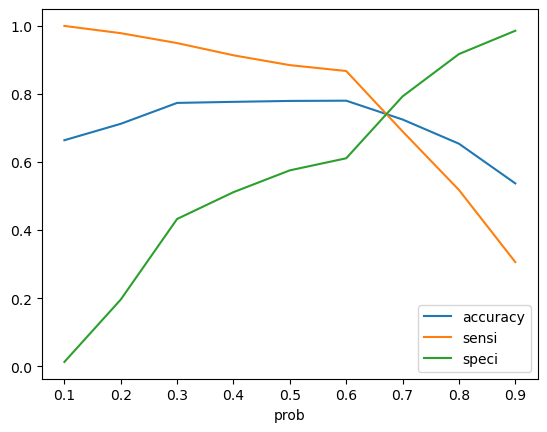

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [150]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.target_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,target,target_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,1,0.629163,1,1,1,1,1,1,1,0,0,0,1
1,1,0.991921,1,1,1,1,1,1,1,1,1,1,1
2,1,0.781546,1,1,1,1,1,1,1,1,0,0,1
3,0,0.774758,1,1,1,1,1,1,1,1,0,0,1
4,0,0.682214,1,1,1,1,1,1,1,0,0,0,1


In [151]:
# Let's check the overall accuracy.
accuracy_score(y_pred.target, y_pred.final_predicted)

0.7802451064359904

In [152]:
# Precision Score
precision_score(y_pred.target, y_pred.final_predicted)

0.8122334430866461

In [153]:
# Recall Score
recall_score(y_pred.target, y_pred.final_predicted)

0.8674801161171556

In [154]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.target, y_pred.target_pred)

#### Precision Recall tradeoff:

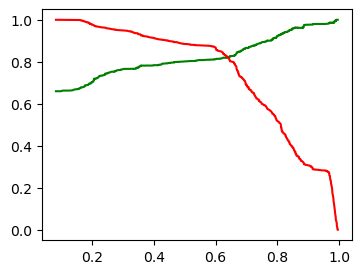

In [155]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

On Precision & Recall trade off we found optimal cutoff of between 0.6 & 0.7 . Hence keeping the optimal cutoff 0.6.

### Plotting the ROC curve

In [156]:
from sklearn.metrics import roc_auc_score,roc_curve

In [157]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Chart')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [158]:
fpr, tpr, thresholds = roc_curve(y_pred.target,y_pred.target_pred,drop_intermediate = False)

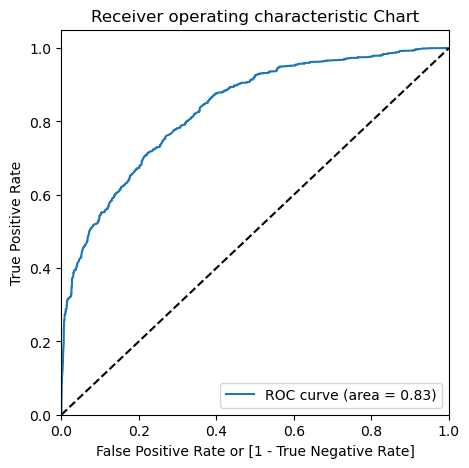

In [159]:
draw_roc(y_pred.target,y_pred.target_pred)

AUC = 0.83 which shows the model is good.

# Step 8: Predictions on Test Set

In [160]:
# Transforming the numerical column of test set
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,60 Days from EOM,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,cluster_id,Invoice_Month
6931,-0.498195,1,0,0,0,0,0,0,0,0,1,12
89649,-0.628779,0,1,0,0,0,0,0,0,0,1,2
73220,-0.568930,0,1,0,0,0,0,0,0,0,0,1
64232,-0.602756,0,0,0,0,0,1,0,0,0,0,10
24178,0.946449,1,0,0,0,0,0,0,0,0,1,7


In [161]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [162]:
#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

6931     0.988202
89649    0.230421
73220    0.162981
64232    0.696626
24178    0.975902
68063    0.315408
41535    0.332746
38951    0.840701
58295    0.845520
7128     0.987403
dtype: float64

In [163]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [164]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [165]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [166]:
y_test_df.head()

,Target,CustID
6931,1,6931
89649,1,89649
73220,1,73220
64232,1,64232
24178,1,24178


In [167]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [168]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Prob'})

In [170]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Target,CustID,Delay_Prob
0,1,6931,0.988202
1,1,89649,0.230421
2,1,73220,0.162981
3,1,64232,0.696626
4,1,24178,0.975902


In [171]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)

In [172]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.Target, y_pred_final.final_predicted)

0.775343361674297

In [173]:
#precision score
precision_score(y_pred_final.Target, y_pred_final.final_predicted)

0.8071806461554266

In [174]:
# Recall Score
recall_score(y_pred.target, y_pred.final_predicted)

0.8674801161171556

Our train and test accuracy is almost same around 77-78 %

#### Lets see performance with Random Forest


In [175]:
# importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [176]:
reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

In [177]:
# creating X and y
X= reg_df
y= merged_df['Target']

In [178]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [180]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [181]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     21846
           1       0.95      0.98      0.97     42371

    accuracy                           0.96     64217
   macro avg       0.96      0.95      0.95     64217
weighted avg       0.96      0.96      0.96     64217

Accuracy is :  0.9582042138374574


In [182]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9525854980321553
Standard deviation: 0.0008904527482347684


In [183]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [184]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      9378
           1       0.93      0.96      0.94     18144

    accuracy                           0.93     27522
   macro avg       0.92      0.91      0.92     27522
weighted avg       0.92      0.93      0.92     27522

Accuracy is :  0.9252234575975583


### Hyperparameter Tuning


In [185]:
#Using Grid search for hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best f1 score: 0.9391036755337085
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     21846
           1       0.95      0.98      0.97     42371

    accuracy                           0.96     64217
   macro avg       0.96      0.95      0.95     64217
weighted avg       0.96      0.96      0.96     64217



In [186]:
# Test set (testing)

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      9378
           1       0.93      0.96      0.94     18144

    accuracy                           0.93     27522
   macro avg       0.92      0.91      0.92     27522
weighted avg       0.92      0.93      0.92     27522



From the above classification report, it can be seen that the f1-score for train and test set is 0.96 and 0.93, which implies that this is a good model. Hence moving forward with this as final model for prediction.

Checking feature importance

In [187]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.470)
2. Invoice_Month (0.134)
3. 30 Days from EOM (0.110)
4. 60 Days from EOM (0.099)
5. cluster_id (0.052)
6. Immediate Payment (0.043)
7. 15 Days from EOM (0.031)
8. 30 Days from Inv Date (0.016)
9. 60 Days from Inv Date (0.012)
10. INV (0.010)
11. 90 Days from Inv Date (0.007)
12. 90 Days from EOM (0.006)
13. 45 Days from EOM (0.005)
14. 45 Days from Inv Date (0.004)
15. DM (0.001)


### Preparing Open Invoice dataset for prediction

The open invoice data has a column 'AGE' which is calculated by taking the difference between Transaction Date and AS_OF_DATE. A positive value in the AGE column clearly indicates that the payment is already overdue. So, there is nothing to predict. But, a negative value in the AGE column means that the due date is yet to be crossed. Hence, the model should be able to predict whether the payment will be delayed or not only for those customers whose AGE value is negative.

In [188]:
# Selecting rows with negative age value for prediction
open_reg_df_age = df_open_inv_data[df_open_inv_data['AGE'] < 0]
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1


In [189]:
open_reg_df_age = pd.merge(open_reg_df_age, cust_dict, how='left', on='Customer_Name')


In [190]:
# Null counts
round(open_reg_df_age.isnull().sum()/len(open_reg_df_age.index), 4)

Customer_Name            0.0000
Due Date                 0.0000
AGE                      0.0000
USD Amount               0.0000
INV_CREATION_DATE        0.0000
15 Days from EOM         0.0000
30 Days from EOM         0.0000
30 Days from Inv Date    0.0000
45 Days from EOM         0.0000
45 Days from Inv Date    0.0000
60 Days from EOM         0.0000
60 Days from Inv Date    0.0000
90 Days from EOM         0.0000
90 Days from Inv Date    0.0000
Immediate Payment        0.0000
DM                       0.0000
INV                      0.0000
cluster_id               0.0274
dtype: float64

cluster_id has 2.7 % null value counts, hence removing the null values for better model prediction as these null values are of new customers whose data is not present in the 'Received Payment data'.

In [191]:
# Dropping the rows containing null values
open_reg_df_age.dropna(axis=0, inplace=True)

In [192]:
open_reg_df_age.shape

(27247, 18)

In [193]:
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0.0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0.0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0.0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0.0


In [194]:
open_reg_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 0 to 28014
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  uint8         
 6   30 Days from EOM       27247 non-null  uint8         
 7   30 Days from Inv Date  27247 non-null  uint8         
 8   45 Days from EOM       27247 non-null  uint8         
 9   45 Days from Inv Date  27247 non-null  uint8         
 10  60 Days from EOM       27247 non-null  uint8         
 11  60 Days from Inv Date  27247 non-null  uint8         
 12  90 Days from EOM       27247 non-null  uint8         
 13  9

In [195]:
# converting the cluster_id column to int
open_reg_df_age['cluster_id'] = open_reg_df_age['cluster_id'].astype('Int64')

In [196]:
# Checking the head after adding 'cluster_id' column
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0


In [197]:
# Creating a copy of open_reg_df_age for final prediction
open_reg_df_final = open_reg_df_age.copy()

In [198]:
# Dropping Customer_Name and AGE column
open_reg_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [199]:
open_reg_df_final['Invoice_Month'] = open_reg_df_final['INV_CREATION_DATE'].dt.month # Extracting Month

In [200]:
# dropping due_date and invoice creation date

open_reg_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [201]:
# Checking the columns in the dataset
open_reg_df_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

### Final Prediction based on Random Forest model


In [202]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_reg_df_final)[:,1]

y_open_invoices

array([1.        , 0.84431868, 0.79963375, ..., 0.68190966, 0.78810889,
       0.02492772])

In [203]:
# Adding the predicted values to the dataframe
open_reg_df_age['Pred_rf'] = y_open_invoices
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1.000000
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.844319
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.799634
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.000000
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.980000


In [204]:
# Customer-wise model prediction
customer_seg_prob= pd.DataFrame(open_reg_df_age.groupby('Customer_Name').prod()['Pred_rf'].round(4))
customer_seg_prob

,Pred_rf
Customer_Name,
3D D Corp,0.0000
6TH Corp,0.0591
ABDU Corp,0.0000
ABEE Corp,0.1179
ABU Corp,0.0048
...,...
XPRE Corp,0.0000
YOUG Corp,0.8939
YOUS Corp,0.0000


In [205]:
# Taking 0.6 as cut off value
open_reg_df_age['Final_Prediction'] = open_reg_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [206]:
# Let us check our final dataframe with predictions
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,1.000000,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.844319,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.799634,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.000000,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.980000,1


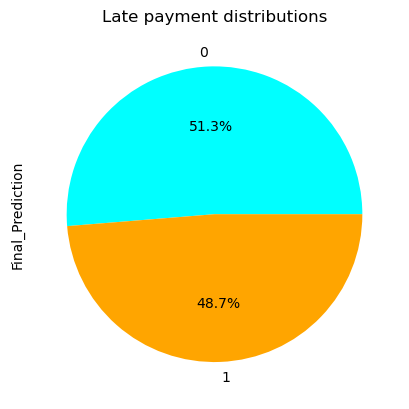

In [207]:
(open_reg_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%', colors = ['cyan','orange'])
plt.title("Late payment distributions")
plt.show()

From the above pie chart, we can observe that 51.3% payments in the open invoice data with AGE value negative(indicating due date not crossed)

## Summary of prediction on Customers_name


In [208]:
# Checking Customers with our target variable_delayed
Delay_payment = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [209]:
# Checking Customers for total invoice counts
Delay_payment_total = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [210]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [211]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [212]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [213]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,4327,8260,52.38
FITR Corp,1038,3454,30.05
PARF Corp,1179,1717,68.67
AREE Corp,755,1117,67.59
ALLI Corp,339,1042,32.53
...,...,...,...
LINT Corp,1,1,100.00
NASM Corp,1,1,100.00
LUBA Corp,1,1,100.00


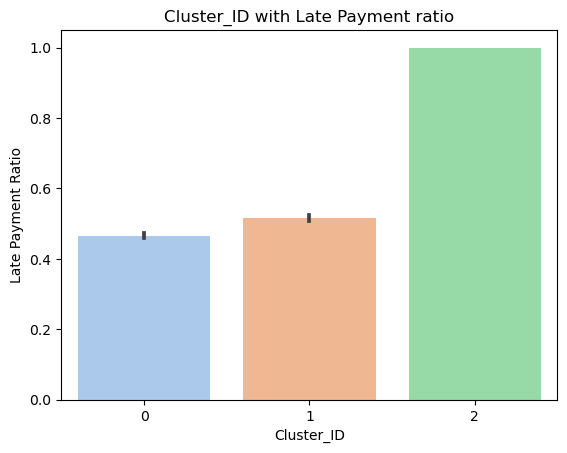

In [214]:
sns.barplot(data=open_reg_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette = "pastel")
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()
#cluster ID 2 has significantly higher ratio of default than clusters 0 and 1

In [215]:
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) # top 10 customers with highest delay rates

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
ALSU Corp,7,7,100.0
LVMH Corp,4,4,100.0
DAEM Corp,3,3,100.0
MAYC Corp,3,3,100.0
MILK Corp,3,3,100.0
MUOS Corp,3,3,100.0
TRAF Corp,3,3,100.0
SHAN Corp,3,3,100.0
ROVE Corp,3,3,100.0
